# Introduction to Convolutional Neural Network (CNN) and Computer Vision with Tensorflow


Computer vision is the practice of writing algorithms which can discover patterns in visual data such as the camera of a self-driving car recognizing the car in front

## Get data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/dansbecker/food-101


However we've modified it to only use 2 classes (pizza 🍕 & steak 🥩) using the image data modification notebook https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

> 🔑 **Note:** We start with a smaller what works (or dataset so we can experiment quickly and figure 

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()


--2022-11-14 12:51:53--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.98.128, 74.125.197.128, 74.125.135.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.98.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M   111MB/s    in 0.9s    

2022-11-14 12:51:54 (111 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is becoming one with the data.

And for a computer vision project, this usually means visualizing many samples of our data


In [2]:
!ls pizza_steak

test  train


In [3]:
!ls pizza_steak/train/

pizza  steak


In [4]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [5]:
import os

# Walk through pizza_steak dir & list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

  

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.


In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, forst lets get the class name programmatically

In [7]:
# Getthe class name programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")])) # Create a list of class names from subdir in train folder
print(class_names)


['pizza' 'steak']


In [8]:
# Visualize image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the targer dir (we'll view image from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  # Read in image and plot using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # Show the shape of image

  return img


['77677.jpg']
Image shape: (512, 384, 3)


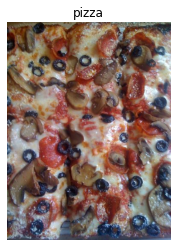

In [9]:
# View random img from train dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="pizza")

In [10]:
import tensorflow as tf
tf.constant(img) #preprocess image into tensor

<tf.Tensor: shape=(512, 384, 3), dtype=uint8, numpy=
array([[[ 65,  44,  15],
        [ 67,  46,  17],
        [ 68,  47,  20],
        ...,
        [131, 148, 130],
        [127, 144, 128],
        [124, 141, 125]],

       [[ 66,  45,  14],
        [ 67,  46,  15],
        [ 68,  47,  18],
        ...,
        [127, 141, 126],
        [123, 140, 124],
        [120, 137, 121]],

       [[ 67,  47,  12],
        [ 68,  48,  15],
        [ 69,  49,  16],
        ...,
        [ 93, 107,  94],
        [ 93, 107,  94],
        [ 91, 105,  92]],

       ...,

       [[ 78,  81,  88],
        [ 66,  70,  79],
        [ 63,  70,  80],
        ...,
        [107, 129, 166],
        [106, 130, 168],
        [107, 131, 169]],

       [[ 56,  60,  69],
        [ 49,  56,  64],
        [ 53,  60,  70],
        ...,
        [115, 143, 180],
        [115, 143, 182],
        [116, 144, 183]],

       [[ 57,  61,  70],
        [ 55,  62,  70],
        [ 64,  71,  81],
        ...,
        [123, 153, 19

In [11]:
# View image shape
img.shape

(512, 384, 3)

🔑 **Note:** many ML models including neural networks prefer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to scale (also referred to as normalize) their pixel values by dividing the image arrays by 255 (since 255 is the max pixel value)

In [12]:
# Normalize = scale -- get all numbers in input tensor to be between 0 and 1

# Get all pixel values between 0 & 1
img/255.


array([[[0.25490196, 0.17254902, 0.05882353],
        [0.2627451 , 0.18039216, 0.06666667],
        [0.26666667, 0.18431373, 0.07843137],
        ...,
        [0.51372549, 0.58039216, 0.50980392],
        [0.49803922, 0.56470588, 0.50196078],
        [0.48627451, 0.55294118, 0.49019608]],

       [[0.25882353, 0.17647059, 0.05490196],
        [0.2627451 , 0.18039216, 0.05882353],
        [0.26666667, 0.18431373, 0.07058824],
        ...,
        [0.49803922, 0.55294118, 0.49411765],
        [0.48235294, 0.54901961, 0.48627451],
        [0.47058824, 0.5372549 , 0.4745098 ]],

       [[0.2627451 , 0.18431373, 0.04705882],
        [0.26666667, 0.18823529, 0.05882353],
        [0.27058824, 0.19215686, 0.0627451 ],
        ...,
        [0.36470588, 0.41960784, 0.36862745],
        [0.36470588, 0.41960784, 0.36862745],
        [0.35686275, 0.41176471, 0.36078431]],

       ...,

       [[0.30588235, 0.31764706, 0.34509804],
        [0.25882353, 0.2745098 , 0.30980392],
        [0.24705882, 0

## End-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find path in our images
* Compile our CNN
* Fit the CNN to our training data


In [13]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths to our data dir
train_dir = "pizza_steak/train"
test_dir = "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224), #reshape image to this
                                               class_mode="binary",
                                               seed=42)


valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN model (same as Tiny VGG on CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224, 224, 3)), # 3 is colour channel

    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))



Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 19s 207ms/step - loss: 0.5289 - accuracy: 0.7327 - val_loss: 0.4531 - val_accuracy: 0.7760
Epoch 2/5
47/47 [==============================] - 9s 195ms/step - loss: 0.4320 - accuracy: 0.8053 - val_loss: 0.3321 - val_accuracy: 0.8700
Epoch 3/5
47/47 [==============================] - 10s 213ms/step - loss: 0.3868 - accuracy: 0.8333 - val_loss: 0.3199 - val_accuracy: 0.8820
Epoch 4/5
47/47 [==============================] - 9s 196ms/step - loss: 0.3403 - accuracy: 0.8573 - val_loss: 0.4400 - val_accuracy: 0.7860
Epoch 5/5
47/47 [==============================] - 9s 197ms/step - loss: 0.3136 - accuracy: 0.8740 - val_loss: 0.2974 - val_accuracy: 0.8880


🔑 **Note:** If the above cell is taking longer than ~10s per epoch, switch to GU

Runtime --> change runtime type --> GPU

Might need to re-run some cells afterwards



In [14]:
len(train_data) 
# best to train data by batches to reduce memory consumption
#In this case size = 47

47

In [15]:
# Get a model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Try a non CNN model on the same image data

In [16]:
# Set random seed
tf.random.set_seed(42)

# Create a model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),

])


# Compile model
model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit model
history_2 = model_2.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 195ms/step - loss: 1.9946 - accuracy: 0.5067 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 184ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 180ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


## Improve non CNN model by adding more layers

Despite having 20x more parameters that our CNN model (model_1, model_2 performs terribly, lets try to imporvise 

In [17]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


In [18]:
import tensorflow as tf

# Set random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid"),

])


# Compile model
model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])


# Fit model
history_3 = model_3.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 185ms/step - loss: 2.7762 - accuracy: 0.6340 - val_loss: 1.7657 - val_accuracy: 0.5660
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.9038 - accuracy: 0.7153 - val_loss: 0.5839 - val_accuracy: 0.7720
Epoch 3/5
47/47 [==============================] - 8s 179ms/step - loss: 0.7613 - accuracy: 0.7007 - val_loss: 1.3085 - val_accuracy: 0.5760
Epoch 4/5
47/47 [==============================] - 8s 179ms/step - loss: 0.6541 - accuracy: 0.7473 - val_loss: 0.4412 - val_accuracy: 0.7940
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.6056 - accuracy: 0.7473 - val_loss: 1.1619 - val_accuracy: 0.5040


In [19]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [20]:
15000000/31000

483.8709677419355

model_3 has almost 500x parameters compared to CNN model (model_1) but still doesnt perform anywhere near

🔑 **Note:** We can think of trainable para,eters as **patterns a model can learn from data**. Intuitively, we might think more is better and in lots of cases, it it.

However, in this case, the difference here is the two different styles of model we're using where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural network seeks to sort out and learn the most important patterns in an image**.

So even though these are less elarnable parameters in our CNN, these are often more helpful in deciphering between diff **features** in an image.

## Binary Classification: Let's break it down

Binary classification (break down)

1. Become one with data (visualize,visualize,visualize)
2. Preprocess the data (prepared it for our model, the main step here is scaling/normalizing & turn our data into batches
3. Create a model (start with a baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfies (experiment,experiment,experiment)

### 1. Become one with data

['2928643.jpg']
Image shape: (289, 512, 3)
['3493457.jpg']
Image shape: (384, 512, 3)


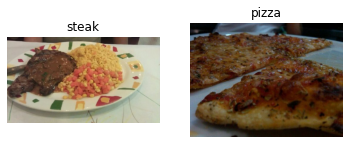

In [21]:
import matplotlib.pyplot as plt
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [22]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/train/"


Turn data into **batches**.

A batch is a small subset of data. Rather that look at all ~10 000 images ar one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10 000 images (or more) might not fir into the memory of processor (GPU)

2. Trying to learn the patterns in 10 000 images in one hit could result in th emodel not being able to learn very well.

Why 32?

Because 32 is good for your health...
Yann LeCun- "Training with latge minibatches is bad for your health. More importantly, it's bad for your test error. Friends dont let friends use minibatches larger than 32. --depends on use cases tho
https://twitter.com/ylecun/status/989610208497360896?lang=en 

In [23]:
!nvidia-smi
# Google provide approx 16GB mem of Tesla T4 GPU

Mon Nov 14 12:55:46 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    30W /  70W |   2422MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [24]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.) # divide all pixel values to 255--make them become between 0 and 1
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Load in our image data from directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, # Target dir of images
                                               target_size=(224,224), # Target size of images (height, width)
                                               class_mode="binary", # type of data you're working with
                                               batch_size=32) # size of minibatches

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             class_mode="binary",
                                             batch_size=32)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [26]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [27]:
# How manu batches are there
len(train_data)

47

In [28]:
1500/32

46.875

In [29]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.4784314 , 0.427451  , 0.3647059 ],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.8313726 , 0.70980394, 0.48627454],
          [0.8431373 , 0.73333335, 0.5372549 ],
          [0.87843144, 0.7725491 , 0.5882353 ]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.5058824 ],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.49411768],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.78039

In [30]:
images[7].shape

(224, 224, 3)

In [31]:
# View the first batch of labels
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that we setup when beginning a machine learning experiment and the as we keep experimenting, we try to beat the baseline.


🔑 **NOTE:** in DL, there's almost an infinite amount of architectures we could create. So one of the best ways to get started is to start with something simple and see if it works with data and then introduce complexity as required. (e.g. look at which current model is performing best in the fields for your problem)


In [32]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential



In [33]:
# Create the model (this will be our baseline, a 3 layer convolutional neural network)
model_4 = Sequential([
    
  Conv2D(filters=10, # filter is the number of sliding windows going across an input( higher = more complex model)
         kernel_size=3, # the size of sliding window going across an input
         strides=1, # size of the step sliding window takes across an input
         padding="same", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  Flatten(),
  Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)

])

# Vid no 118 for details

In [34]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [35]:
# Get summary of model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 224, 224, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 222, 222, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 484000)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 484001    
                                                                 
Total params: 486,101
Trainable params: 486,101
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [36]:
# Check the lengths of training and test data generators
len(train_data), len(test_data)

(47, 47)

In [37]:
# Fit the model
history_4 = model_4.fit(train_data,  # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 19s 378ms/step - loss: 1.4086 - accuracy: 0.6440 - val_loss: 0.4713 - val_accuracy: 0.7920
Epoch 2/5
47/47 [==============================] - 13s 285ms/step - loss: 0.4533 - accuracy: 0.7853 - val_loss: 0.3891 - val_accuracy: 0.8453
Epoch 3/5
47/47 [==============================] - 13s 282ms/step - loss: 0.3568 - accuracy: 0.8560 - val_loss: 0.3281 - val_accuracy: 0.8627
Epoch 4/5
47/47 [==============================] - 13s 285ms/step - loss: 0.2279 - accuracy: 0.9127 - val_loss: 0.1529 - val_accuracy: 0.9540
Epoch 5/5
47/47 [==============================] - 13s 286ms/step - loss: 0.1089 - accuracy: 0.9667 - val_loss: 0.0519 - val_accuracy: 0.9940


### 5. Evaluate baseline model

It looks like our model is learning something. Let's evaluate it

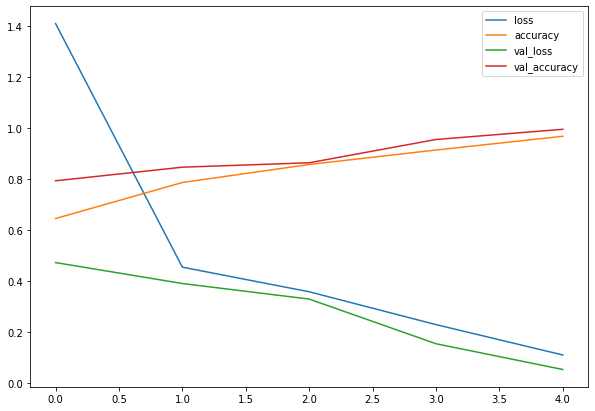

In [38]:
# Plot training curve
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7))

In [39]:
# Plot validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot  loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();


🔑**NOTE:** When a model's **validation loss start to increase** it's likely that the mode is **overfitting** the training dataset.

This means its learning the patterns in training dataset *too well* and thus the model's ability to generalize to unseen data will be diminished

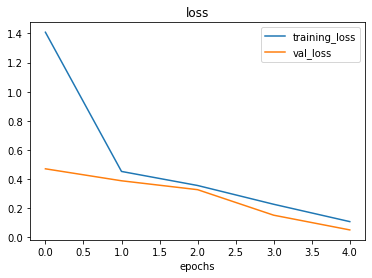

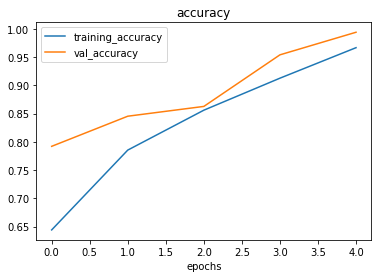

In [40]:
plot_loss_curves(history_4)

This model seems good:
* Loss decreases over time (no overfitting)
* Accuracy increases over time

### 6. Adjust the model parameters

Fitting a machine learning model comes in 3 steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:

* Increase the number of conv layers
* Increase the number of conv filters
* Add another dense layer to the output of our flattened layer


Reduce overfitting:
* Add data augmentation
* Add regularization layers (such as MaxPool2D--take max value out of all the val ==condensing input into smaller output)
* Add more data ...

🔑 **NOTE:** Reducing overfitting is also known as **regularization** 

In [41]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential


In [42]:
# Create the model (this is going to be our new baseline)
model_5 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

In [43]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [44]:
# Fit the model
history_5 = model_5.fit(train_data,
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 193ms/step - loss: 0.6262 - accuracy: 0.6660 - val_loss: 0.4760 - val_accuracy: 0.7695
Epoch 2/5
47/47 [==============================] - 9s 189ms/step - loss: 0.4536 - accuracy: 0.7973 - val_loss: 0.4211 - val_accuracy: 0.8086
Epoch 3/5
47/47 [==============================] - 9s 190ms/step - loss: 0.4288 - accuracy: 0.8060 - val_loss: 0.4110 - val_accuracy: 0.8047
Epoch 4/5
47/47 [==============================] - 11s 231ms/step - loss: 0.3970 - accuracy: 0.8300 - val_loss: 0.3953 - val_accuracy: 0.8184
Epoch 5/5
47/47 [==============================] - 9s 190ms/step - loss: 0.3707 - accuracy: 0.8433 - val_loss: 0.3230 - val_accuracy: 0.8652


Model 4:
Epoch 5/5
47/47 [==============================] - 13s 286ms/step - loss: 0.1089 - accuracy: 0.9667 - val_loss: 0.0519 - val_accuracy: 0.9940

In [45]:
# Get summary
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 52, 52, 10)        910       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 26, 26, 10)      

224 reduced to 222

then maxpooling halves it into 111 & so on

Total num of param == reduced

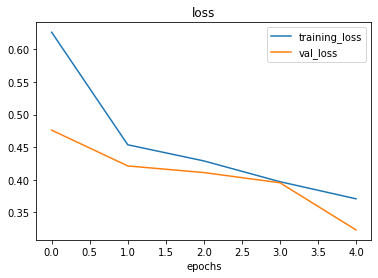

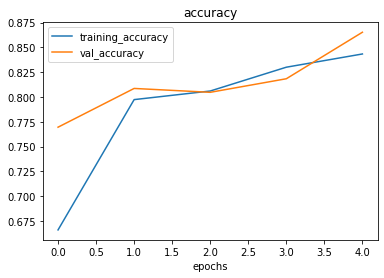

In [46]:
plot_loss_curves(history_5)

### 6. Adjust different parameters and improve the model (try to beat our baseline)

In [47]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

🤔 **Question:** what is data augmentation?

Data augmentation is the process of altering our training data, leading to have more diversity and in turn allowing our models to learn more generalizable (hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or something similar.


Visualize data augmentation

In [48]:
IMG_SIZE = (224, 224)

# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32, # 32 default val
                                                                   class_mode="binary",
                                                                   shuffle=False) # for demo only


# Create non_augmented train data batches
print("Non-Augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False) 


# Create non_augmented test data batches
print("Non-Augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False) 





Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented test data
Found 1500 images belonging to 2 classes.


🔑 **Note:** Data augmentation is usually only performed on the training data. Using `ImageDataGenerator` built-in data augmentation parameters our images are left as they are in the dir but modified as they're loaded into the model


Finally, let's visualize some augmented data!!

In [49]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #note: labels aren't augmented, only data (images)



showing image number: 6


(-0.5, 223.5, 223.5, -0.5)

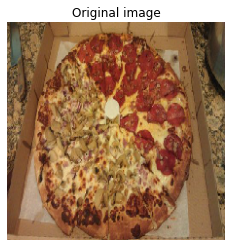

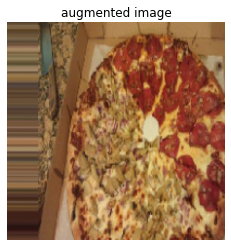

In [52]:
# Show ori image and augmented image
import random
random_number = random.randint(0, 32) #our batch size are 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False)

Now we've seen what augmented data looks like, let's build a model & see how it learns

Augmented data is changed on the fly, so it takes longer to process

In [51]:
# Create a mode (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit model
history_6 = model_6.fit(train_data_augmented, # fitting model_6 on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 543ms/step - loss: 0.7056 - accuracy: 0.4840 - val_loss: 0.6843 - val_accuracy: 0.6820
Epoch 2/5
47/47 [==============================] - 26s 549ms/step - loss: 0.7016 - accuracy: 0.5060 - val_loss: 0.6722 - val_accuracy: 0.5140
Epoch 3/5
47/47 [==============================] - 25s 538ms/step - loss: 0.6895 - accuracy: 0.5607 - val_loss: 0.6683 - val_accuracy: 0.6240
Epoch 4/5
47/47 [==============================] - 25s 539ms/step - loss: 0.6694 - accuracy: 0.6280 - val_loss: 0.6009 - val_accuracy: 0.7887
Epoch 5/5
47/47 [==============================] - 25s 542ms/step - loss: 0.6577 - accuracy: 0.6667 - val_loss: 0.6310 - val_accuracy: 0.6020


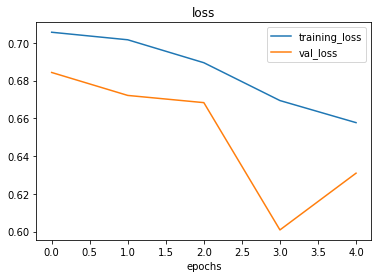

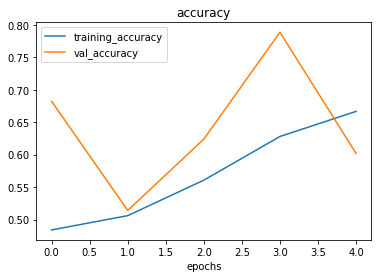

In [53]:
# Check model training curves
plot_loss_curves(history_6)

This time shuffle the data

In [54]:
IMG_SIZE = (224, 224)

# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32, # 32 default val
                                                                   class_mode="binary",
                                                                   shuffle=True) 


# Create non_augmented train data batches
print("Non-Augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False) 


# Create non_augmented test data batches
print("Non-Augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False) 





Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented training data
Found 1500 images belonging to 2 classes.
Non-Augmented test data
Found 1500 images belonging to 2 classes.


In [55]:
# Create model --> same as 5 and 6
model_7 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224, 224, 3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# Compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit model
history_7 = model_7.fit(train_data_augmented_shuffled, # fitting model_6 on augmented data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 26s 544ms/step - loss: 0.6579 - accuracy: 0.6073 - val_loss: 0.5883 - val_accuracy: 0.7033
Epoch 2/5
47/47 [==============================] - 25s 534ms/step - loss: 0.6005 - accuracy: 0.6820 - val_loss: 0.5800 - val_accuracy: 0.6793
Epoch 3/5
47/47 [==============================] - 25s 539ms/step - loss: 0.5535 - accuracy: 0.7220 - val_loss: 0.4645 - val_accuracy: 0.7893
Epoch 4/5
47/47 [==============================] - 25s 536ms/step - loss: 0.5058 - accuracy: 0.7613 - val_loss: 0.4083 - val_accuracy: 0.8147
Epoch 5/5
47/47 [==============================] - 25s 534ms/step - loss: 0.4682 - accuracy: 0.7860 - val_loss: 0.5027 - val_accuracy: 0.7740


In [56]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


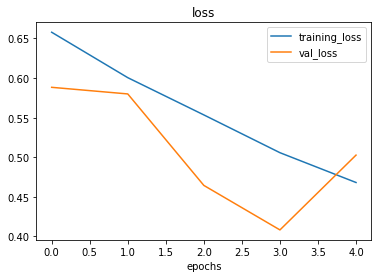

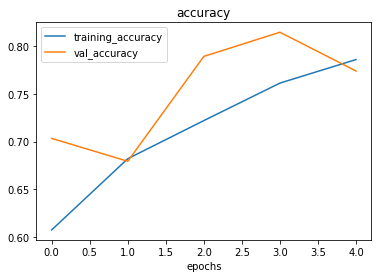

In [57]:
# plot loss curves
plot_loss_curves(history_7)

🔑 **Note:** When shuffling training data, the model gets exposed to all different kinds of data during training, thus enabling it to learn features across a wide array of images (in our case, pizza & steak at the same time instead of just pizza then steak)

### 7. Repeat until satisfied

Since we've already eaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model layers (e.g. add more `Conv2D` / `MaxPool2D` layers)
* Increase the number of filters in each convolutional layer (e.g. from 10 to 32 or even 64)
* Train for linger (more epochs)
* Find an ideal learning rate
* Get more data (give the model more opportunities to learn)
* Use **transfer learning** to leverage what another image model has learn and adjust it for our own use case


## Making a prediction with our trained model on our own custom data

In [58]:
# Classes we're working with
print(class_names)

['pizza' 'steak']


--2022-11-14 13:08:10--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.04s   

2022-11-14 13:08:10 (48.5 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



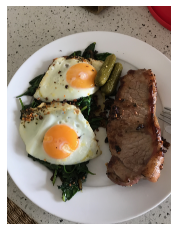

In [59]:
# View example image
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread("03-steak.jpeg")
plt.imshow(steak)
plt.axis(False);

In [60]:
# Check the shape of our image
steak.shape

(4032, 3024, 3)

This image has (h, w, colour channelrgb)
The fn expect a batch size too

In [61]:
tf.expand_dims(steak, axis=0)

<tf.Tensor: shape=(1, 4032, 3024, 3), dtype=uint8, numpy=
array([[[[162, 158, 149],
         [163, 159, 150],
         [166, 162, 153],
         ...,
         [136,  17,  23],
         [140,  21,  27],
         [140,  21,  27]],

        [[164, 160, 151],
         [164, 160, 151],
         [164, 160, 151],
         ...,
         [133,  14,  20],
         [134,  15,  21],
         [137,  18,  24]],

        [[166, 162, 153],
         [165, 161, 152],
         [163, 159, 150],
         ...,
         [136,  17,  23],
         [134,  15,  21],
         [136,  17,  23]],

        ...,

        [[154, 132, 109],
         [142, 122,  98],
         [101,  80,  59],
         ...,
         [165, 154, 148],
         [152, 141, 135],
         [140, 129, 123]],

        [[141, 119,  95],
         [139, 117,  93],
         [106,  86,  62],
         ...,
         [158, 147, 141],
         [142, 131, 125],
         [138, 127, 121]],

        [[148, 127, 100],
         [149, 127, 103],
         [114,  

In [62]:
(tf.expand_dims(steak, axis=0)).shape

TensorShape([1, 4032, 3024, 3])

Now we have all 4 details (h, w, colour, batch) == (ndim=4)

However, we'll need to reshape it to correct arrangement (proper explanation refer to note below)

🔑 **Note:** When we train a neural network and we want to make a prediction with it on our own custom data, it's important that our custom data (or new data) is preprocesses into the same format as the data that our model was trained on

In [63]:
# Create a function to import image and resize it so it can be used with our model
def load_and_prep_image(filename, img_shape=224):
  """
  Reads an image from filename, turns it into a tensor and reshape it to (img_shape, img_shape, colour_channels)
  """
  # Read in image
  img = tf.io.read_file(filename)
  # Decode the read file into a tensor & ensure 3 colour channels 
  # (our model is trained on images with 3 colour channels and sometimes images have 4 colour channels)
  img = tf.image.decode_image(img, channels=3)
  # Resize the image
  img = tf.image.resize(img, size = [img_shape, img_shape])
  # Rescale the image (get all values bet 0 and 1)
  img = img/255.
  return img




In [64]:
# Load in and preprocess our custom image
steak = load_and_prep_image("03-steak.jpeg")
steak

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.6377451 , 0.6220588 , 0.57892156],
        [0.6504902 , 0.63186276, 0.5897059 ],
        [0.63186276, 0.60833335, 0.5612745 ],
        ...,
        [0.52156866, 0.05098039, 0.09019608],
        [0.49509802, 0.04215686, 0.07058824],
        [0.52843136, 0.07745098, 0.10490196]],

       [[0.6617647 , 0.6460784 , 0.6107843 ],
        [0.6387255 , 0.6230392 , 0.57598037],
        [0.65588236, 0.63235295, 0.5852941 ],
        ...,
        [0.5352941 , 0.06862745, 0.09215686],
        [0.529902  , 0.05931373, 0.09460784],
        [0.5142157 , 0.05539216, 0.08676471]],

       [[0.6519608 , 0.6362745 , 0.5892157 ],
        [0.6392157 , 0.6137255 , 0.56764704],
        [0.65637255, 0.6269608 , 0.5828431 ],
        ...,
        [0.53137255, 0.06470589, 0.08039216],
        [0.527451  , 0.06862745, 0.1       ],
        [0.52254903, 0.05196078, 0.0872549 ]],

       ...,

       [[0.49313724, 0.42745098, 0.31029412],
        [0.05

In [65]:
pred = model_7.predict(tf.expand_dims(steak,axis=0))
pred

1/1 [==============================] - 0s 167ms/step


array([[0.97888273]], dtype=float32)

Looking at our data arrangements (folder, 0-pizza, 1-steak

the result (probability 0.83564883) is closer to 1, therefore it's a steak!

Visualize!!

In [66]:
# Remind ourselves of our class names
class_names

array(['pizza', 'steak'], dtype='<U5')

In [67]:
# Index the predicted class by rounding the prediction probability and indexing it on class names
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [68]:
def pred_and_plot(model, filename, class_names=class_names):
  """
  Imports an image located at filename, makes a prediction with model 
  and plots the image with the predicted class as the title.
  """
  # Import target image and preprocess it
  img = load_and_prep_image(filename)

  #Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get predicted class
  pred_class = class_names[int(tf.round(pred))]

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);





1/1 [==============================] - 0s 17ms/step


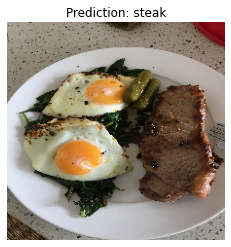

In [69]:
# Test model on custom image
pred_and_plot(model_7, "03-steak.jpeg")

OUR MODEL WORKS!
Try on dif image. This time a pizza

--2022-11-14 13:08:40--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.04s   

2022-11-14 13:08:41 (67.1 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]

1/1 [==============================] - 0s 20ms/step


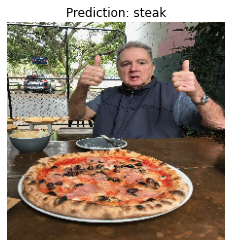

In [70]:
# Download another custom image to test and predict on it
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
pred_and_plot(model_7, "03-pizza-dad.jpeg")

# Multi-class Image Classification

We've just been throug a bunch of the following steps with a binary classification problem (pizza vs steak) , now we're going to step things up a notch with 10 classes of food (multi-class classification)

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start with a baseline)
4. Fit the model (overfit it to make sure it works)
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)
7. Repeat until satisfied


### 1. Import and become one with data

In [71]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# Unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2022-11-14 13:08:49--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 108.177.98.128, 74.125.197.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   233MB/s    in 2.1s    

2022-11-14 13:08:51 (233 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [72]:
import os 

# Walk through 1 classes of food image data
for dirpath, dirnames, filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in '10_food_classes_all_data'.
There are 10 directories and 0 images in '10_food_classes_all_data/train'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/sushi'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'.
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'.

In [73]:
!ls -la 10_food_classes_all_data/

total 16
drwxr-xr-x  4 root root 4096 Nov 14 13:08 .
drwxr-xr-x  1 root root 4096 Nov 14 13:08 ..
drwxr-xr-x 12 root root 4096 Nov 14 13:08 test
drwxr-xr-x 12 root root 4096 Nov 14 13:08 train


In [74]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"


In [75]:
# Let's get class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['2011264.jpg']
Image shape: (512, 512, 3)


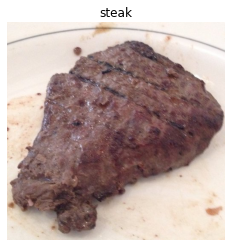

In [76]:
# Visualize
import random
img = view_random_image(target_dir=train_dir,
                        target_class=random.choice(class_names))

### 2. Preprocess the data (prepare it for a model)
* turn data into tensors

In [77]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224), # target size can be any size that we want, but the common best suit is 255
                                               batch_size=32,
                                               class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode="categorical")



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


### 3. Create a CNN model (start with a baseline)



In [78]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [79]:
# Create the model (this will be our baseline, a 3 layer convolutional neural network)
model_8 = Sequential([
    
  Conv2D(filters=10, # filter is the number of sliding windows going across an input( higher = more complex model)
         kernel_size=3, # the size of sliding window going across an input
         strides=1, # size of the step sliding window takes across an input
         padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") # output layer (working with multiclass classification so 10 output neuron == 10 classes)

])

# Compile the model
model_8.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

### 4. Fit the model

In [80]:
# Fit the model
history_8 = model_8.fit(train_data,  # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        #Enable this to validate a bit quicker
                        #validation_steps=int(0.25 * len(test_data))
                        )

Epoch 1/5
235/235 [==============================] - 45s 191ms/step - loss: 2.1773 - accuracy: 0.1939 - val_loss: 2.0266 - val_accuracy: 0.2744
Epoch 2/5
235/235 [==============================] - 44s 188ms/step - loss: 1.9276 - accuracy: 0.3260 - val_loss: 1.9175 - val_accuracy: 0.3268
Epoch 3/5
235/235 [==============================] - 44s 187ms/step - loss: 1.6421 - accuracy: 0.4499 - val_loss: 1.8978 - val_accuracy: 0.3572
Epoch 4/5
235/235 [==============================] - 44s 187ms/step - loss: 1.1043 - accuracy: 0.6393 - val_loss: 2.2464 - val_accuracy: 0.3012
Epoch 5/5
235/235 [==============================] - 44s 187ms/step - loss: 0.5205 - accuracy: 0.8384 - val_loss: 2.8620 - val_accuracy: 0.3124


### 5. Evaluate the baseline model

In [81]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 134ms/step - loss: 2.8620 - accuracy: 0.3124


[2.8620338439941406, 0.3124000132083893]

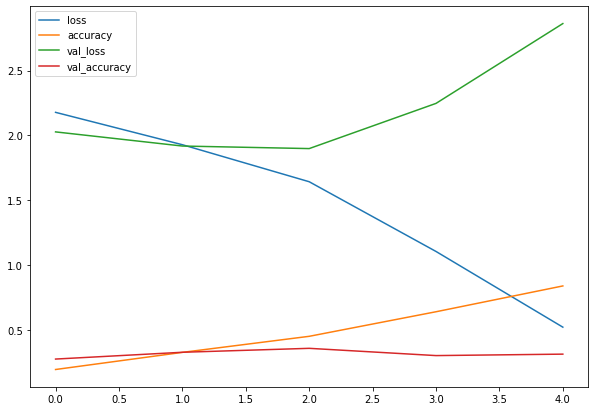

In [82]:
# Plot training curve
import pandas as pd
pd.DataFrame(history_8.history).plot(figsize=(10,7))

In [83]:
# Plot validation and training curves separately
def plot_loss_curves(history):
  """
  Returns separate loss curves for training and validation metrics.
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"])) # how many epochs did we run for?

  # Plot  loss
  plt.plot(epochs, loss, label="training_loss")
  plt.plot(epochs, val_loss, label="val_loss")
  plt.title("loss")
  plt.xlabel("epochs")
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="training_accuracy")
  plt.plot(epochs, val_accuracy, label="val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend();

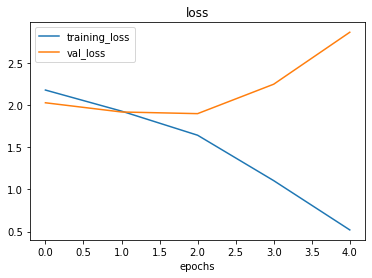

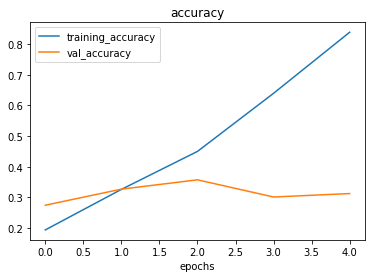

In [84]:
plot_loss_curves(history_8)

From the loss curves, the model seems to be **overfitting**

In ther wordsm it's getting great results on training data but fails to generaize well to unseen data and performs poorly on the test dataset.

### 6. Adjust different hyperparameters and improve the model (try to beat baseline/reduce overfitting)

Based from the model's performance, it's clear that our model is learning something

However, it's not generalizing well to unseen data

Let's try and fix overfitting:
* **Get more data** - gives model more opportunity to learn 
* **Simplify the model** - overfitting might be a sign that the model is too complicated: reduce # of layers / reduce # hidden units in layers
* **Use data augmentation** - manipulates the training data in such a way to add more diversity to it (without altering ori data)
* **Use transfer learning** - transfer learning leverages the patterns another model has learned on similar data to our own and allows us to use those patterns on our own dataset


In [85]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

#### Fix overfitting by simplyfying the data

Remove 2 convolutional layers

In [86]:
# Create the model (this will be our baseline, a 3 layer convolutional neural network)
model_9 = Sequential([
    
  Conv2D(filters=10, # filter is the number of sliding windows going across an input( higher = more complex model)
         kernel_size=3, # the size of sliding window going across an input
         strides=1, # size of the step sliding window takes across an input
         padding="valid", # if "same", output shape is same as input shape, if "valid", output shape gets compressed
         activation="relu",
         input_shape=(224, 224, 3)), # input layer (specify input shape)
  MaxPool2D(),
  Conv2D(10, 3, activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation="softmax") # output layer (working with multiclass classification so 10 output neuron == 10 classes)

])

# Compile the model
model_9.compile(loss="categorical_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics="accuracy")

In [87]:
# Fit the model
history_9 = model_9.fit(train_data,  # this is a combination of labels and sample data
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data)
                        #Enable this to validate a bit quicker
                        #validation_steps=int(0.25 * len(test_data))
                        )

Epoch 1/5
235/235 [==============================] - 43s 183ms/step - loss: 2.3152 - accuracy: 0.2343 - val_loss: 2.0011 - val_accuracy: 0.2896
Epoch 2/5
235/235 [==============================] - 43s 182ms/step - loss: 1.7913 - accuracy: 0.3943 - val_loss: 1.8873 - val_accuracy: 0.3412
Epoch 3/5
235/235 [==============================] - 42s 181ms/step - loss: 1.4564 - accuracy: 0.5204 - val_loss: 1.9590 - val_accuracy: 0.3324
Epoch 4/5
235/235 [==============================] - 42s 179ms/step - loss: 1.0825 - accuracy: 0.6509 - val_loss: 2.2150 - val_accuracy: 0.3112
Epoch 5/5
235/235 [==============================] - 42s 180ms/step - loss: 0.6981 - accuracy: 0.7853 - val_loss: 2.5414 - val_accuracy: 0.2880


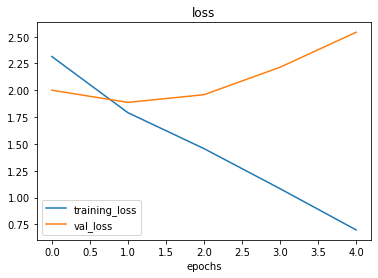

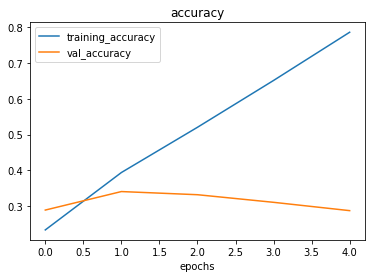

In [88]:
plot_loss_curves(history_9)

Comment: Not much different than previous ( no improvement)

In [89]:
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 111, 111, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_21 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 54, 54, 10)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 29160)             0         
                                                                 
 dense_13 (Dense)            (None, 10)               

In [90]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 conv2d_17 (Conv2D)          (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 110, 110, 10)     0         
 g2D)                                                            
                                                                 
 conv2d_18 (Conv2D)          (None, 108, 108, 10)      910       
                                                                 
 conv2d_19 (Conv2D)          (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 53, 53, 10)       0         
 g2D)                                                 

#### Fix overfitting with data augmentation

In [91]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.3,
                                             horizontal_flip=True)



# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator without data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

In [92]:
IMG_SIZE = (224, 224)

# Import data and augment it from training directory
print("Augmented training data")
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=IMG_SIZE,
                                                                   batch_size=32, # 32 default val
                                                                   class_mode="categorical",
                                                                   shuffle=False) # for demo only


# Create non_augmented train data batches
print("Non-Augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=IMG_SIZE,
                                               batch_size=32,
                                               class_mode="categorical",
                                               shuffle=False) 


# Create non_augmented test data batches
print("Non-Augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=IMG_SIZE,
                                             batch_size=32,
                                             class_mode="categorical",
                                             shuffle=False) 





Augmented training data
Found 7500 images belonging to 10 classes.
Non-Augmented training data
Found 7500 images belonging to 10 classes.
Non-Augmented test data
Found 2500 images belonging to 10 classes.


In [93]:
# Get sample data batches
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next() #note: labels aren't augmented, only data (images)



View augmented data

showing image number: 7


(-0.5, 223.5, 223.5, -0.5)

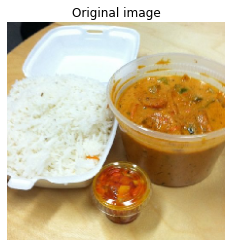

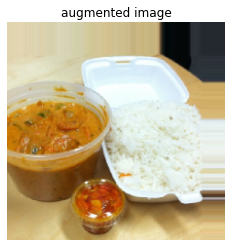

In [95]:
# Show ori image and augmented image
import random
random_number = random.randint(0, 32) #our batch size are 32
print(f"showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"augmented image")
plt.axis(False)

Create model with augmented data

In [96]:
# clone model_8 
model_10 = tf.keras.models.clone_model(model_8)

# Compile the cloned model (using same setup)
model_10.compile(loss="categorical_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics="accuracy")

In [97]:
# Fit the model
history_10 = model_10.fit(train_data_augmented,
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 107s 454ms/step - loss: 2.3422 - accuracy: 0.0600 - val_loss: 2.3024 - val_accuracy: 0.1136
Epoch 2/5
235/235 [==============================] - 107s 453ms/step - loss: 2.3050 - accuracy: 0.0908 - val_loss: 2.3025 - val_accuracy: 0.1000
Epoch 3/5
235/235 [==============================] - 107s 455ms/step - loss: 2.3041 - accuracy: 0.0699 - val_loss: 2.3024 - val_accuracy: 0.1000
Epoch 4/5
235/235 [==============================] - 106s 452ms/step - loss: 2.3042 - accuracy: 0.0725 - val_loss: 2.2996 - val_accuracy: 0.1052
Epoch 5/5
235/235 [==============================] - 108s 461ms/step - loss: 2.3257 - accuracy: 0.0840 - val_loss: 2.3026 - val_accuracy: 0.1000


In [98]:
model_8.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 2.8620 - accuracy: 0.3124


[2.8620340824127197, 0.3124000132083893]

In [99]:
model_10.evaluate(test_data)

79/79 [==============================] - 11s 133ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302581310272217, 0.10000000149011612]

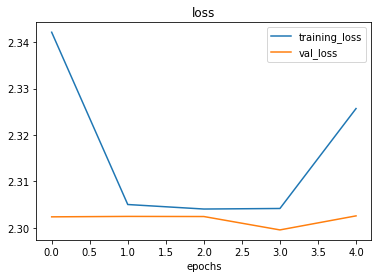

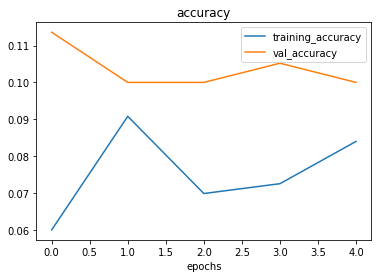

In [100]:
# Check our model trained on augmented data's loss curve
plot_loss_curves(history_10)

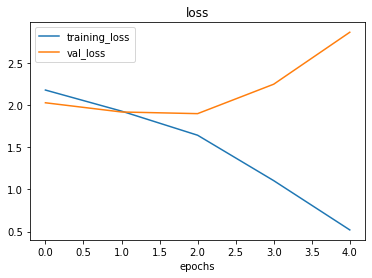

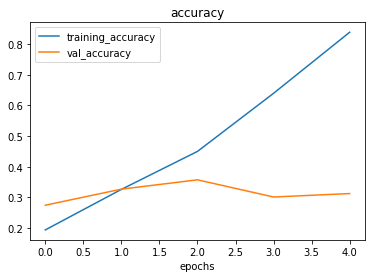

In [101]:
plot_loss_curves(history_8)

Model_10 loss curve are much closer to each other than the baseline model and they look like they're heading in the right direction (certainly not the wrong direction).

We might see further improvement if we train for longer

### 7. Repeat until satisfied

We could keep going here...continually trying to bring our loss curve closer together and trying to improve the validation/test accuracy.

How?

By running lots of experiments:
* Restructuring our model's architecture (increasing layers/hidden units)
* Adjust learning rate
* Try diff method of data augmentation (adjust hyperparameters i our ImageDataGenerator instance)
* Train for longer (e.g 10 instead of 5 epochs)
* Try **transfer learning**

### Making a prediction with our trained model on custom images

In [103]:
# Remind ourselves of the classes our model is trained on
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [104]:
# Download some custom images
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg



--2022-11-14 13:56:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg.1’

03-pizza-dad.jpeg.1 100%[===================>]   2.74M  --.-KB/s    in 0.05s   

2022-11-14 13:56:16 (55.9 MB/s) - ‘03-pizza-dad.jpeg.1’ saved [2874848/2874848]

--2022-11-14 13:56:16--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awai

In [106]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 132ms/step


TypeError: ignored

as of now,  pred_and_plot() function only works with binary cases.

We need to adjust this fn

In [128]:
# Reconfig pred_and_plot to work with multiclass

def pred_and_plot(model, filename, class_names):
  """
  Imports an image located at filename, makes a prediction on it with
  a trained model and plots the image with the predicted class as the title.
  """
  # Import the target image and preprocess it
  img = load_and_prep_image(filename)

  # Make a prediction
  pred = model.predict(tf.expand_dims(img, axis=0))

  # Get the predicted class
  if len(pred[0]) > 1: # check for multi-class
    pred_class = class_names[pred.argmax()] # if more than one output, take the max
  else:
    pred_class = class_names[int(tf.round(pred)[0][0])] # if only one output, round

  # Plot the image and predicted class
  plt.imshow(img)
  plt.title(f"Prediction: {pred_class}")
  plt.axis(False);

1/1 [==============================] - 0s 22ms/step


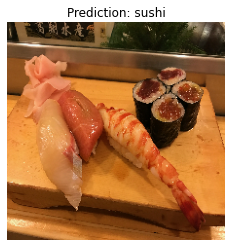

In [129]:
# Make a prediction using model_10
pred_and_plot(model=model_10,
              filename="03-sushi.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 18ms/step


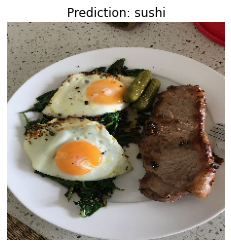

In [130]:
pred_and_plot(model=model_10,
              filename="03-steak.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 17ms/step


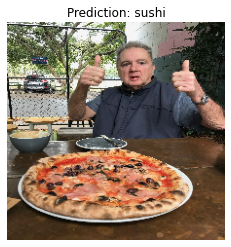

In [131]:
pred_and_plot(model=model_10,
              filename="03-pizza-dad.jpeg",
              class_names=class_names)

1/1 [==============================] - 0s 44ms/step


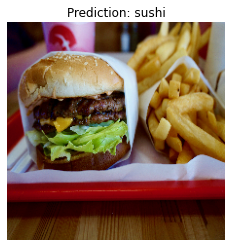

In [140]:
pred_and_plot(model_10,"03-hamburger.jpeg", class_names)

1/1 [==============================] - 0s 15ms/step


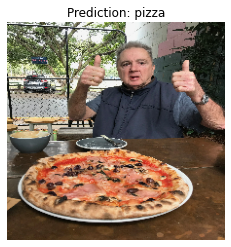

In [152]:
# Binary classification
pred_and_plot(model=model_5,
              filename="03-pizza-dad.jpeg",
              class_names=["pizza", "steak"])

Looks like our model didn't perform very well on our custom images but this because it achieve low accuracy on test data.

Therefore we could expect it to fn poorly on unseen data

### Save and load model

* Save a model

In [133]:
model_10.save("tfMulticlass_saved_trained_model")

* Load and evaluate model

In [153]:
loaded_model_10 = tf.keras.models.load_model("tfMulticlass_saved_trained_model")
loaded_model_10.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302581310272217, 0.10000000149011612]

In [154]:
# Compare our unsaved model's results (same as above)
model_10.evaluate(test_data)

79/79 [==============================] - 13s 158ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302581310272217, 0.10000000149011612]